In [3]:
!pip install ultralytics -q

from ultralytics import YOLO
from google.colab import drive, files
from IPython.display import Image, display
import os





Loading from: /content/best.pt
Model loaded successfully.
Model classes: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5'}

upload img for inference


Saving Screenshot 2025-11-04 213412.jpg to Screenshot 2025-11-04 213412.jpg

Successfully uploaded: Screenshot 2025-11-04 213412.jpg
Running inference

image 1/1 /content/Screenshot 2025-11-04 213412.jpg: 416x640 1 2, 2 4s, 116.1ms
Speed: 3.6ms preprocess, 116.1ms inference, 15.9ms postprocess per image at shape (1, 3, 416, 640)
Results saved to /content/runs/detect/predict3

Detection Results:
Class: 2
  Confidence: 0.82
  Coordinates: [x1: 241, y1: 182, x2: 548, y2: 345]
Class: 4
  Confidence: 0.72
  Coordinates: [x1: 0, y1: 7, x2: 317, y2: 275]
Class: 4
  Confidence: 0.33
  Coordinates: [x1: 407, y1: 138, x2: 571, y2: 254]

Displaying annotated image:


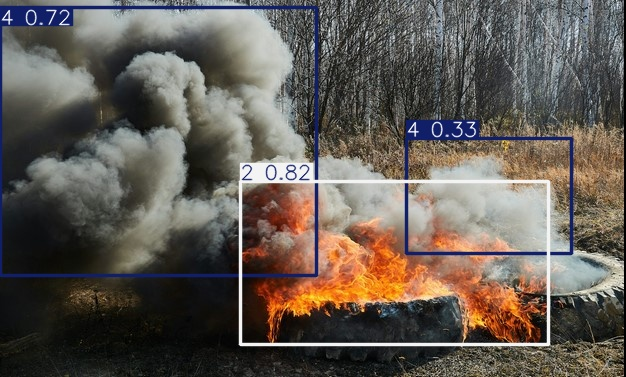

In [5]:
MODEL_PATH = "/content/best.pt"


print(f"Loading from: {MODEL_PATH}")
try:
    model = YOLO(MODEL_PATH)
    print("Model loaded successfully.")
    print(f"Model classes: {model.names}")
except Exception as e:
    print(f"Error loading model. Check the MODEL_PATH. Error: {e}")


print("\nupload img for inference")
uploaded = files.upload()

if len(uploaded.keys()) > 0:
    test_image_path = list(uploaded.keys())[0]
    print(f"\nSuccessfully uploaded: {test_image_path}")
    print("Running inference")
    results = model.predict(test_image_path, save=True)

    print("\nDetection Results:")
    for r in results:
        boxes = r.boxes
        if not boxes:
            print("No objects detected.")

        for box in boxes:
            x1, y1, x2, y2 = box.xyxy[0].tolist()
            conf = box.conf[0].item()
            cls = int(box.cls[0].item())
            class_name = model.names[cls]

            print(f"Class: {class_name}")
            print(f"  Confidence: {conf:.2f}")
            print(f"  Coordinates: [x1: {x1:.0f}, y1: {y1:.0f}, x2: {x2:.0f}, y2: {y2:.0f}]")

    result_image_path = os.path.join(results[0].save_dir, test_image_path)

    print("\nDisplaying annotated image:")
    display(Image(filename=result_image_path))

else:
    print("No file was uploaded.")